# Szeregi czasowe

Antoni Pięta

Jaub Ziarko

In [50]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

### Ładowanie datasetu

In [51]:
df = 'result.csv'
dataset = pd.read_csv(df)

In [52]:
dataset = dataset[['datetime_from', 'avg(pm10)']]

In [53]:
dataset

,datetime_from,avg(pm10)
0,2020-04-20 00:00:00,26.202500
1,2020-04-20 01:00:00,26.457000
2,2020-04-20 02:00:00,26.813500
3,2020-04-20 03:00:00,25.633000
4,2020-04-20 04:00:00,28.324000
...,...,...
313,2020-05-03 01:00:00,46.484348
314,2020-05-03 02:00:00,49.949565
315,2020-05-03 03:00:00,35.460870
316,2020-05-03 04:00:00,14.475217


In [54]:
dataset['datetime_from'] = pd.to_datetime(dataset['datetime_from'])
y = dataset.set_index(['datetime_from'])

In [55]:
y.head(5)

,avg(pm10)
datetime_from,
2020-04-20 00:00:00,26.2025
2020-04-20 01:00:00,26.4570
2020-04-20 02:00:00,26.8135
2020-04-20 03:00:00,25.6330
2020-04-20 04:00:00,28.3240


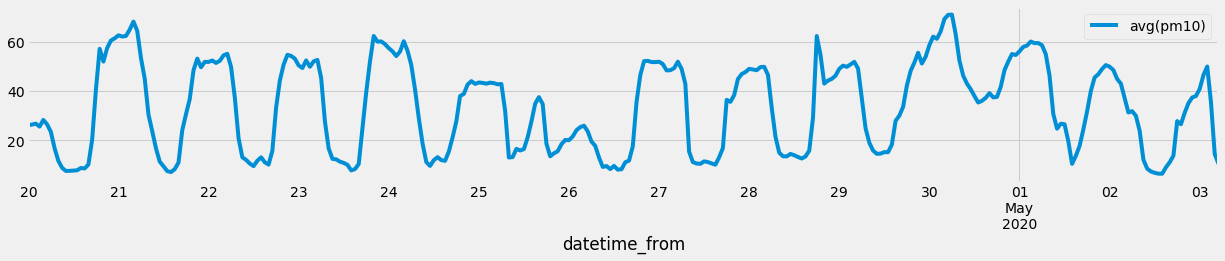

In [56]:
y.plot(figsize=(19, 3))
plt.show()

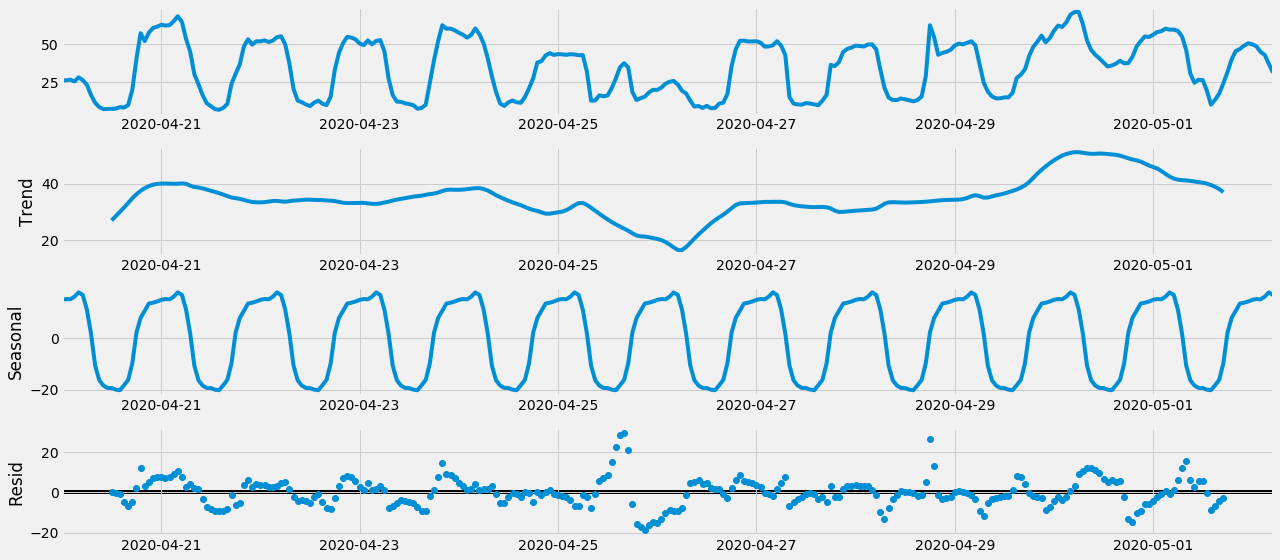

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2980.0961724008775
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2814.086950519545
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2754.2521082930493
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2350.9965656297923
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2718.0257540289695
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2471.1751242894516
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2200.6657224965784
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2184.98915419649
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2592.1488818211483
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2442.245977983476
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2391.7785550246335
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2024.7805372738208
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2359.2469777794977
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2137.5410838705793
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1923.1490641385558
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1892.0131376144604
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1901.9272206628252
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1803.0333605389

In [42]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8868      0.036     24.466      0.000       0.816       0.958
ma.L1          0.4657      0.058      8.007      0.000       0.352       0.580
ar.S.L12      -0.5150      0.048    -10.783      0.000      -0.609      -0.421
ma.S.L12      -0.8599      0.034    -25.070      0.000      -0.927      -0.793
sigma2        21.6255      1.352     15.992      0.000      18.975      24.276


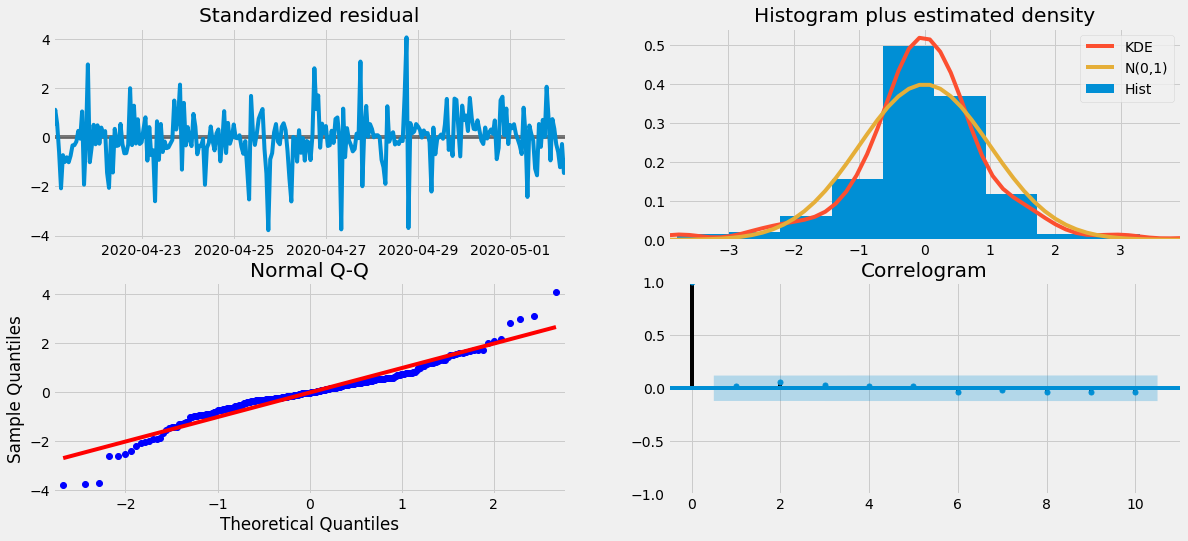

In [43]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

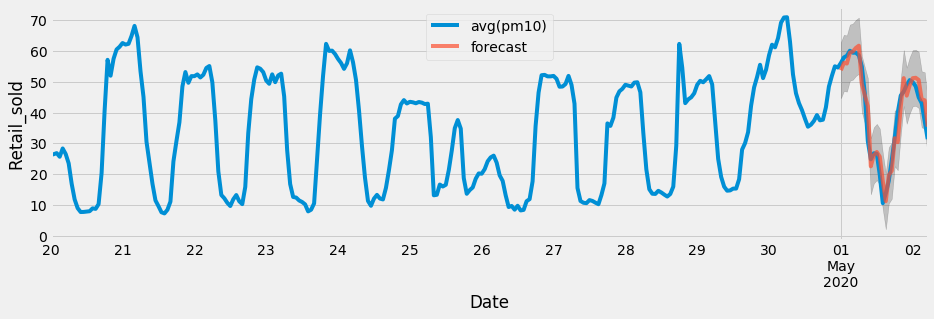

In [48]:
pred = results.get_prediction(start=pd.to_datetime('2020-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-04-30':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2020-05-01 00:00:00   NaN
2020-05-01 01:00:00   NaN
2020-05-01 02:00:00   NaN
2020-05-01 03:00:00   NaN
2020-05-01 04:00:00   NaN
2020-05-01 05:00:00   NaN
2020-05-01 06:00:00   NaN
2020-05-01 07:00:00   NaN
2020-05-01 08:00:00   NaN
2020-05-01 09:00:00   NaN
2020-05-01 10:00:00   NaN
2020-05-01 11:00:00   NaN
2020-05-01 12:00:00   NaN
2020-05-01 13:00:00   NaN
2020-05-01 14:00:00   NaN
2020-05-01 15:00:00   NaN
2020-05-01 16:00:00   NaN
2020-05-01 17:00:00   NaN
2020-05-01 18:00:00   NaN
2020-05-01 19:00:00   NaN
2020-05-01 20:00:00   NaN
2020-05-01 21:00:00   NaN
2020-05-01 22:00:00   NaN
2020-05-01 23:00:00   NaN
2020-05-02 00:00:00   NaN
2020-05-02 01:00:00   NaN
2020-05-02 02:00:00   NaN
2020-05-02 03:00:00   NaN
2020-05-02 04:00:00   NaN
2020-05-02 05:00:00   NaN
avg(pm10)             NaN
dtype: float64
The Root Mean Squared Error is 2020-05-01 00:00:00   NaN
2020-05-01 01:00:00   NaN
2020-05-01 02:00:00   NaN
2020-05-01 03:00:00   NaN
2020-05-01 04:00:0

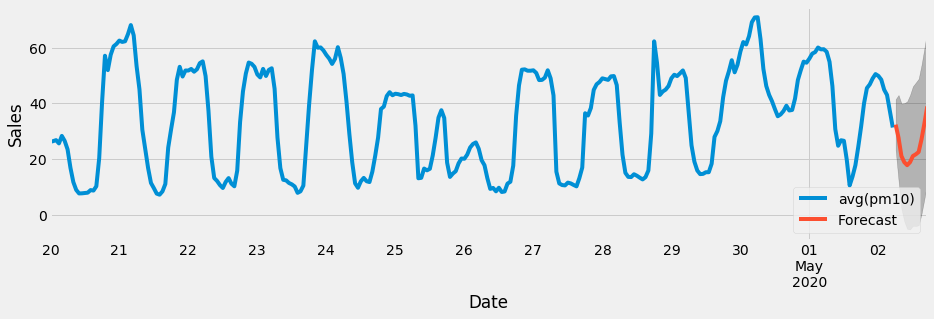

In [49]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()